In [1]:
import pandas as pd
import sklearn.datasets as d

In [2]:
x = d.load_breast_cancer()
df = pd.DataFrame(data = x.data, columns = x.feature_names)
df['target'] = x.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 1. 선형분리

In [6]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_validate, cross_val_score

svm_clf = svm.SVC(kernel = 'linear', random_state=42)

scores = cross_val_score(svm_clf, X=X_train, y=y_train, cv=5)
scores

array([0.9625    , 0.925     , 1.        , 0.96202532, 0.91139241])

In [7]:
val1_score_df = pd.DataFrame(cross_validate(svm_clf, X=X_train, y=y_train, cv=5))
print(val1_score_df['test_score'].mean())
val1_score_df

0.9521835443037976


,fit_time,score_time,test_score
0,1.713466,0.002992,0.962500
1,0.540571,0.003972,0.925000
2,1.708445,0.001999,1.000000
3,1.593754,0.001978,0.962025
4,0.691115,0.001996,0.911392


In [8]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [9]:
y_train_pred = svm_clf.predict(X_train)

y_pred = svm_clf.predict(X_test)

In [10]:
print('Train_Accuracy: ', svm_clf.score(X_train, y_train),'\n')

train_accuracy = mt.accuracy_score(y_train, y_train_pred)
train_recall = mt.recall_score(y_train, y_train_pred)
train_precision = mt.precision_score(y_train, y_train_pred)
train_f1_score = mt.f1_score(y_train, y_train_pred)
train_matrix = mt.confusion_matrix(y_train, y_train_pred)

print('Accuracy: ', format(train_accuracy, '.2f'), '\n')
print('Recall: ', format(train_recall, '.2f'), '\n')
print('Precision: ', format(train_precision, '.2f'), '\n')
print('f1_Score: ', format(train_f1_score, '.2f'), '\n')
print('Confusion_matrix: ', '\n', train_matrix)

Train_Accuracy:  0.964824120603015 

Accuracy:  0.96 

Recall:  0.99 

Precision:  0.96 

f1_Score:  0.97 

Confusion_matrix:  
 [[138  11]
 [  3 246]]


In [11]:
accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy, '.2f'), '\n')
print('Recall: ', format(recall, '.2f'), '\n')
print('Precision: ', format(precision, '.2f'), '\n')
print('f1_Score: ', format(f1_score, '.2f'), '\n')
print('Confusion_matrix: ', '\n', matrix)

Accuracy:  0.96 

Recall:  0.98 

Precision:  0.96 

f1_Score:  0.97 

Confusion_matrix:  
 [[ 59   4]
 [  2 106]]


## 2. 비선형 분리

In [12]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_validate, cross_val_score

svm_clf = svm.SVC(kernel = 'rbf', random_state=42)

scores = cross_val_score(svm_clf, X=X_train, y=y_train, cv=5)
scores

array([0.9       , 0.9       , 0.9375    , 0.86075949, 0.87341772])

In [13]:
val2_score_df = pd.DataFrame(cross_validate(svm_clf, X=X_train, y=y_train, cv=5))
print(val2_score_df['test_score'].mean())
val2_score_df

0.8943354430379747


,fit_time,score_time,test_score
0,0.011968,0.006981,0.900000
1,0.041889,0.008975,0.900000
2,0.012963,0.005985,0.937500
3,0.011967,0.006981,0.860759
4,0.009973,0.006982,0.873418


In [14]:
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [15]:
y_train_pred = svm_clf.predict(X_train)

y_pred = svm_clf.predict(X_test)

In [16]:
print('Train_Accuracy: ', svm_clf.score(X_train, y_train),'\n')

train_accuracy = mt.accuracy_score(y_train, y_train_pred)
train_recall = mt.recall_score(y_train, y_train_pred)
train_precision = mt.precision_score(y_train, y_train_pred)
train_f1_score = mt.f1_score(y_train, y_train_pred)
train_matrix = mt.confusion_matrix(y_train, y_train_pred)

print('Accuracy: ', format(train_accuracy, '.2f'), '\n')
print('Recall: ', format(train_recall, '.2f'), '\n')
print('Precision: ', format(train_precision, '.2f'), '\n')
print('f1_Score: ', format(train_f1_score, '.2f'), '\n')
print('Confusion_matrix: ', '\n', train_matrix)

Train_Accuracy:  0.8994974874371859 

Accuracy:  0.90 

Recall:  0.99 

Precision:  0.87 

f1_Score:  0.92 

Confusion_matrix:  
 [[112  37]
 [  3 246]]


In [17]:
accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy, '.2f'), '\n')
print('Recall: ', format(recall, '.2f'), '\n')
print('Precision: ', format(precision, '.2f'), '\n')
print('f1_Score: ', format(f1_score, '.2f'), '\n')
print('Confusion_matrix: ', '\n', matrix)

Accuracy:  0.94 

Recall:  1.00 

Precision:  0.91 

f1_Score:  0.95 

Confusion_matrix:  
 [[ 52  11]
 [  0 108]]


## 3. 선형분리 스케일링 적용

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [19]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_validate, cross_val_score

svm_clf = svm.SVC(kernel = 'linear', random_state=42)

scores = cross_val_score(svm_clf, X=X_train_scaled, y=y_train, cv=5)
scores

array([0.975     , 0.975     , 1.        , 0.97468354, 0.94936709])

In [20]:
val3_score_df = pd.DataFrame(cross_validate(svm_clf, X=X_train_scaled, y=y_train, cv=5))
print(val3_score_df['test_score'].mean())
val3_score_df

0.9748101265822784


,fit_time,score_time,test_score
0,0.007979,0.001993,0.975000
1,0.005983,0.001997,0.975000
2,0.006980,0.000998,1.000000
3,0.007979,0.001995,0.974684
4,0.006982,0.005983,0.949367


## 4. 선형분리 하이퍼파라미터 적용

- C(cost) : 어느 정도의 오차를 허용할지에 대한 파라미터
- kernel : 어떤 커널함수를 사용할지에 대한 파라미터입니다. 'linear', 'sigmoid', 'rbf', 'poly'가 활용
- degree : 어느 차수까지의 다항차수로 분류를 할 지에 대한 파라미터. 커널함수가 'poly' 일 때 사용
- gamma : 곡률 경계에 대한 파라미터. 'rbf', 'poly', 'sigmoid'일 때 튜닝하는 값
- coef0 : 상수값으로써 'poly', 'sigmoid'일 때 튜닝을 진행

In [21]:
from sklearn.model_selection import GridSearchCV

svm_clf = svm.SVC(kernel='linear', random_state=42)
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf, param_grid=parameters, cv=5)

In [22]:
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]})

In [23]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
2,0.100,0.974842
3,1.000,0.974810
4,10.000,0.967278
7,100.000,0.957278
5,25.000,0.957247
6,50.000,0.954778
1,0.010,0.954715
0,0.001,0.927057


## 5. 비선형분리 하이퍼파라미터 적용

유방암 진단 데이터셋에서 비선형 분리에 적합하지 않기 때문에 새로운 데이터셋에 적용

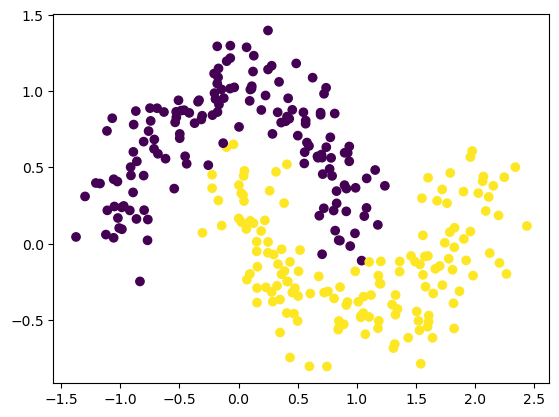

In [25]:
import matplotlib.pyplot as plt

X, y = d.make_moons(n_samples = 300, noise = 0.16, random_state = 42)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [26]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [27]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
svm_clf =svm.SVC(kernel = 'linear', random_state=100)

# 교차검증
scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.86


In [28]:
# SVM, kernel = 'rbf'로 비선형분리 진행
svm_clf =svm.SVC(kernel = 'rbf')

# 교차검증
scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.97


In [29]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
svm_clf = svm.SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
20,0.100,10.000,0.980952
35,10.000,1.000,0.976190
27,1.000,1.000,0.976190
28,1.000,10.000,0.971429
43,25.000,1.000,0.966667
...,...,...,...
17,0.100,0.010,0.519048
22,0.100,50.000,0.519048
23,0.100,100.000,0.519048
24,1.000,0.001,0.519048
